In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import string
import nltk

In [3]:
tweet = pd.read_csv("C:/Users/KIIT/Downloads/twitter-airline-sentiment/Tweets.csv")

In [4]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 15,Unnamed: 16
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,NaN
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,NaN
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,NaN
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,NaN
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,NaN


In [21]:
tweet.shape

(14640, 17)

In [22]:
columns =['airline_sentiment','airline_sentiment_confidence','airline','text']
airline = tweet.loc[:,columns]

In [30]:
airline.head()

,airline_sentiment,airline_sentiment_confidence,airline,text,tidy_tweet
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica didn today must mean need take a...
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli thing about


In [24]:
airline['tidy_tweet'] = airline['text'].str.replace("[^a-zA-Z#]", " ")

In [25]:
airline['tidy_tweet'] = airline['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [26]:
airline['tidy_tweet'] = airline['text'].str.replace("[^a-zA-Z#]", " ")
airline['tidy_tweet'] = airline['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = airline['tidy_tweet'].apply(lambda x: x.split())

In [27]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [28]:
tokenized_tweet.head()

0                [virginamerica, what, dhepburn, said]
1    [virginamerica, plu, ad, commerci, experi, tacki]
2    [virginamerica, didn, today, must, mean, need,...
3    [virginamerica, realli, aggress, blast, obnoxi...
4                [virginamerica, realli, thing, about]
Name: tidy_tweet, dtype: object

In [29]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

airline['tidy_tweet'] = tokenized_tweet

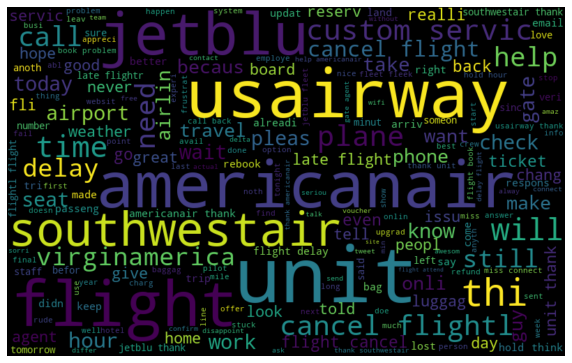

In [32]:
all_words = ' '.join([text for text in airline['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [33]:
negative = airline[airline['airline_sentiment'] == 'negative']

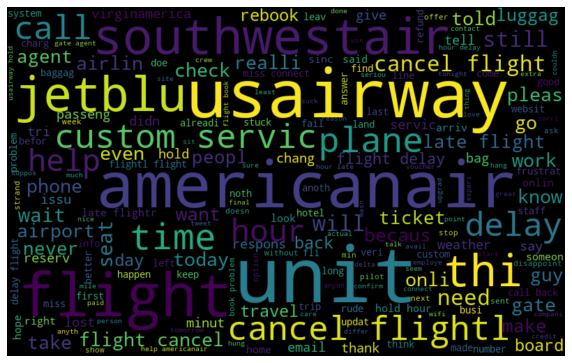

In [34]:
all_words = ' '.join([text for text in negative['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [35]:
positive = airline[airline['airline_sentiment'] == 'positive']

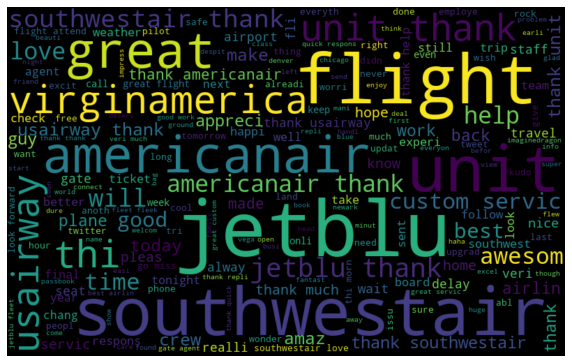

In [36]:
all_words = ' '.join([text for text in positive['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
#remove names of airlines from tweets for better analysis but not for prediction!
#

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(airline['tidy_tweet'])

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(airline['tidy_tweet'])

In [39]:
airline.drop('airline_sentiment_confidence',axis=1,inplace=True)

In [44]:
airline.head()

,airline_sentiment,airline,text,tidy_tweet
0,1,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said
1,2,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki
2,1,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica didn today must mean need take a...
3,0,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...
4,0,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli thing about


In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
  

airline['airline_sentiment']= label_encoder.fit_transform(airline['airline_sentiment']) 
  

In [54]:
one_hot_features = ['airline']

one_hot_encoded = pd.get_dummies(airline[one_hot_features])

airline = airline.drop(one_hot_features, axis=1)


airline = pd.concat([airline, one_hot_encoded], axis=1)

In [55]:
airline.head()

,airline_sentiment,text,tidy_tweet,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said,0,0,0,0,0,1
1,2,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,0,0,0,0,0,1
2,1,@VirginAmerica I didn't today... Must mean I n...,virginamerica didn today must mean need take a...,0,0,0,0,0,1
3,0,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,0,0,0,0,0,1
4,0,@VirginAmerica and it's a really big bad thing...,virginamerica realli thing about,0,0,0,0,0,1


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [57]:
air = airline.drop(['text','tidy_tweet'],axis=1)

In [58]:
air.head()

,airline_sentiment,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1,0,0,0,0,0,1
1,2,0,0,0,0,0,1
2,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [68]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(tfidf, airline['airline_sentiment'], random_state=40, test_size=0.3)

In [69]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
prediction = lreg.predict(xvalid_bow)

In [71]:
from sklearn.metrics import r2_score

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(yvalid, prediction, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2781
           1       0.66      0.44      0.53       949
           2       0.77      0.60      0.68       662

    accuracy                           0.78      4392
   macro avg       0.74      0.66      0.69      4392
weighted avg       0.77      0.78      0.76      4392



In [74]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
forest = RandomForestClassifier(n_estimators=50)

In [78]:
forest.fit(xtrain_bow, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
prediction = forest.predict(xvalid_bow)

In [80]:
print(classification_report(yvalid, prediction, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2781
           1       0.60      0.37      0.45       949
           2       0.71      0.58      0.64       662

    accuracy                           0.75      4392
   macro avg       0.70      0.62      0.64      4392
weighted avg       0.73      0.75      0.73      4392



In [ ]:
# 0 negative 2 positive

In [202]:
airl = airline[airline['airline_sentiment'] != 1]

In [203]:
airl.head()

,airline_sentiment,text,tidy_tweet,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
1,2,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,0,0,0,0,0,1
3,0,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,0,0,0,0,0,1
4,0,@VirginAmerica and it's a really big bad thing...,virginamerica realli thing about,0,0,0,0,0,1
5,0,@VirginAmerica seriously would pay $30 a fligh...,virginamerica serious would flight seat that d...,0,0,0,0,0,1
6,2,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica nearli everi time thi worm away,0,0,0,0,0,1


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(airl['tidy_tweet'])

In [86]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(tfidf, airl['airline_sentiment'], random_state=40, test_size=0.3)

In [87]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
prediction = lreg.predict(xvalid_bow)

In [89]:
print(classification_report(yvalid, prediction, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2747
           1       0.00      0.00      0.00         0
           2       0.85      0.63      0.72       716

   micro avg       0.90      0.90      0.90      3463
   macro avg       0.59      0.53      0.55      3463
weighted avg       0.90      0.90      0.89      3463



c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [95]:
forest = RandomForestClassifier(n_estimators=20)

In [96]:
forest.fit(xtrain_bow, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
prediction = forest.predict(xvalid_bow)

In [98]:
print(classification_report(yvalid, prediction, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2747
           1       0.00      0.00      0.00         0
           2       0.80      0.63      0.71       716

   micro avg       0.89      0.89      0.89      3463
   macro avg       0.57      0.53      0.55      3463
weighted avg       0.89      0.89      0.89      3463



c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [94]:
from sklearn.ensemble import BaggingClassifier

In [100]:
bag = BaggingClassifier()

In [101]:
bag.fit(xtrain_bow, ytrain)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [102]:
prediction = bag.predict(xvalid_bow)

In [103]:
print(classification_report(yvalid, prediction, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2747
           1       0.00      0.00      0.00         0
           2       0.75      0.66      0.70       716

   micro avg       0.88      0.88      0.88      3463
   macro avg       0.56      0.53      0.54      3463
weighted avg       0.88      0.88      0.88      3463



c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [104]:
from sklearn.ensemble import VotingClassifier

In [108]:
vot = VotingClassifier(estimators=[('lr', lreg), ('rf', forest)],voting="soft")

In [109]:
vot.fit(xtrain_bow, ytrain)

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                           

In [110]:
prediction = vot.predict(xvalid_bow)

In [111]:
print(classification_report(yvalid, prediction, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2747
           1       0.00      0.00      0.00         0
           2       0.83      0.63      0.72       716

   micro avg       0.90      0.90      0.90      3463
   macro avg       0.58      0.53      0.55      3463
weighted avg       0.89      0.90      0.89      3463



c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [178]:
from sklearn.metrics import accuracy_score

In [179]:
accuracy_score(yvalid,prediction)

0.8980652613341034

In [112]:
xvalid_bow

<3463x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 24333 stored elements in Compressed Sparse Row format>

In [113]:
xtrain_bow

<8078x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 57582 stored elements in Compressed Sparse Row format>

In [115]:
airl.shape

(11541, 9)

In [194]:
airl.groupby('airline_sentiment').count()

,text,tidy_tweet,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
airline_sentiment,,,,,,,,
0.0,9178,9178,9178,9178,9178,9178,9178,9178
2.0,2363,2363,2363,2363,2363,2363,2363,2363


In [195]:
statement = "Hey United , such a filthy airline!"
airl.loc[11541,'text'] = statement

In [196]:
airl.reset_index(inplace=True)
airl.drop('index',axis=1,inplace=True)

In [197]:
airl['tidy_tweet'] = airl['text'].str.replace("[^a-zA-Z#]", " ")
airl['tidy_tweet'] = airl['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = airl['tidy_tweet'].apply(lambda x: x.split())



tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

airl['tidy_tweet'] = tokenized_tweet

In [198]:
airl.tail()

,airline_sentiment,text,tidy_tweet,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
11537,0.0,@AmericanAir right on cue with the delays👌,americanair right with delay,1.0,0.0,0.0,0.0,0.0,0.0
11538,2.0,@AmericanAir thank you we got on a different f...,americanair thank differ flight chicago,1.0,0.0,0.0,0.0,0.0,0.0
11539,0.0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leav over minut late flight warn c...,1.0,0.0,0.0,0.0,0.0,0.0
11540,0.0,"@AmericanAir you have my money, you change my ...",americanair have money chang flight answer you...,1.0,0.0,0.0,0.0,0.0,0.0
11541,NaN,"Hey United , such a filthy airline!",unit such filthi airlin,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(airl['tidy_tweet'])

In [185]:
tfidf

<11545x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 81935 stored elements in Compressed Sparse Row format>

In [200]:
vot.predict(tfidf[11540:])

array([0, 0])

In [201]:
# The model can correctly predict negative tweets but does not guarantee correct prediction of positive tweets . 
# The main reason for this can be that in the original data set , negative tweets by far outnumber positive ones thus 
# leading to overfitting

In [204]:
airl.tail()

,airline_sentiment,text,tidy_tweet,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
14633,0,@AmericanAir my flight was Cancelled Flightled...,americanair flight cancel flightl leav tomorro...,1,0,0,0,0,0
14634,0,@AmericanAir right on cue with the delays👌,americanair right with delay,1,0,0,0,0,0
14635,2,@AmericanAir thank you we got on a different f...,americanair thank differ flight chicago,1,0,0,0,0,0
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leav over minut late flight warn c...,1,0,0,0,0,0
14638,0,"@AmericanAir you have my money, you change my ...",americanair have money chang flight answer you...,1,0,0,0,0,0
